In [2]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import pandas as pd
import numpy as np


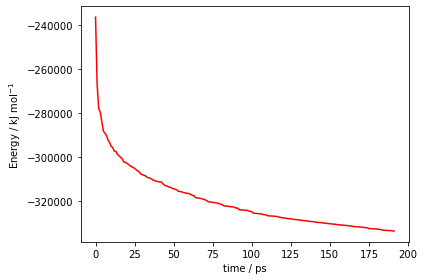

In [3]:
potential_file = "../minimisation/potential.xvg"
reader = mda.auxiliary.XVG.XVGReader(potential_file)
print(reader)
time = [step.data[0] for step in reader]
potential = [step.data[1] for step in reader]
plt.plot(time, potential, c="red")
plt.xlabel("time / ps")
plt.ylabel(r"Energy / kJ mol$^{-1}$")
plt.tight_layout()
plt.savefig("../plots/potential.png")

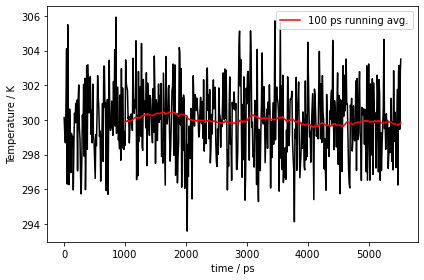

In [20]:
temp_file = "../nvt/temperature.xvg"
reader = mda.auxiliary.XVG.XVGReader(temp_file)
print(reader)
time = [step.data[0] for step in reader]
temperature = [step.data[1] for step in reader]
temperature_df = pd.DataFrame({"time": time, "temperature": temperature})
running_avg = temperature_df["temperature"].rolling(window=100).mean().to_numpy()
avg_temperature = np.where(np.isnan(running_avg), 0, running_avg)
plt.plot(time, temperature, c="black")
plt.plot(time, running_avg, c="red", label = "100 ps running avg.")
plt.xlabel("time / ps")
plt.ylabel("Temperature / K")
plt.tight_layout()
plt.legend()
plt.savefig("../plots/temperature.png", dpi=1000, transparent=True)

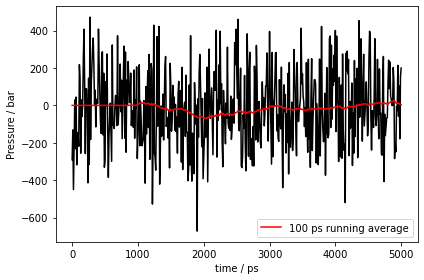

In [24]:
pressure_file = "../npt/pressure.xvg"
reader = mda.auxiliary.XVG.XVGReader(pressure_file)
print(reader)
time = [step.data[0] for step in reader]
pressure = [step.data[1] for step in reader]
pressure_df = pd.DataFrame({"time": time, "pressure": pressure})
running_avg = pressure_df["pressure"].rolling(window=100).mean().to_numpy()
avg_pressure = np.where(np.isnan(running_avg), 0, running_avg)
plt.plot(time, pressure, c="black")
plt.plot(time, avg_pressure, c="red", label="100 ps running average")
plt.xlabel("time / ps")
plt.ylabel("Pressure / bar")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/pressure.png", dpi=1000, transparent=True)

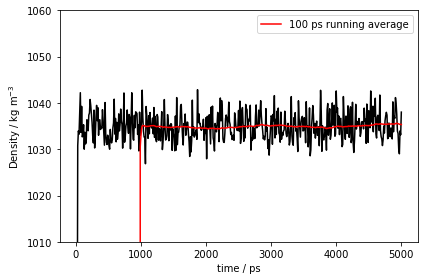

In [29]:
density_file = "../npt/density.xvg"
reader = mda.auxiliary.XVG.XVGReader(density_file)
print(reader)
time = [step.data[0] for step in reader]
density = [step.data[1] for step in reader]
density_df = pd.DataFrame({"time": time, "density": density})
running_avg = density_df["density"].rolling(window=100).mean().to_numpy()
avg_density = np.where(np.isnan(running_avg), 0, running_avg)
plt.plot(time, density, c="black")
plt.plot(time, avg_density, c="red", label="100 ps running average")
plt.xlabel("time / ps")
plt.ylabel(r"Density / kg m$^{-3}$")
plt.ylim(1010, 1060)
plt.legend()
plt.tight_layout()
plt.savefig("../plots/density.png", dpi=1000, transparent=True)

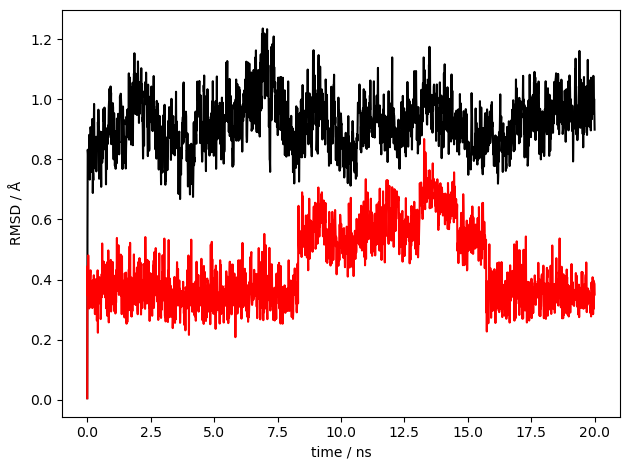

In [8]:
rmsd_file = "../production/rmsd.xvg"
reader = mda.auxiliary.XVG.XVGReader(rmsd_file)
time = [step.data[0] for step in reader]
rmsd = [step.data[1]*10 for step in reader]
rmsd_lig_file = "../production/rmsd_lig.xvg"
reader = mda.auxiliary.XVG.XVGReader(rmsd_lig_file)
time_lig = [step.data[0] for step in reader]
rmsd_lig = [step.data[1]*10 for step in reader]
plt.plot(time, rmsd, c="black")
plt.plot(time_lig, rmsd_lig, c="red")
plt.xlabel("time / ns")
plt.ylabel("RMSD / Å")
plt.tight_layout()
plt.savefig("../plots/rmsd.png")